    HOURS  PASS
0    0.50     0
1    0.75     0
2    1.00     0
3    1.25     0
4    1.50     0
5    1.75     0
6    1.75     1
7    2.00     0
8    2.25     1
9    2.50     0
10   2.75     1
11   3.00     0
12   3.25     1
13   3.50     0
14   4.00     1
15   4.25     1
16   4.50     1
17   4.75     1
18   5.00     1
19   5.50     1
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



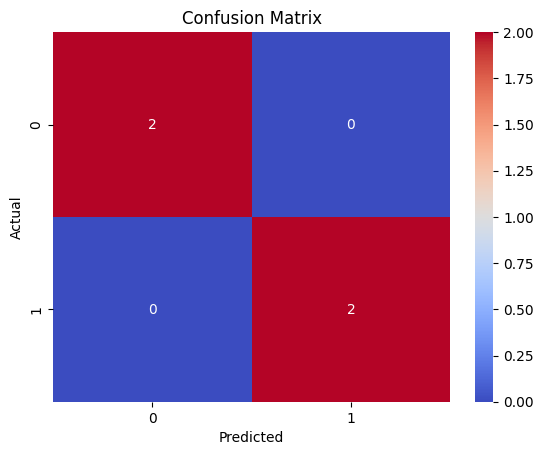

Predicted class for HOURS:5.43 : 1


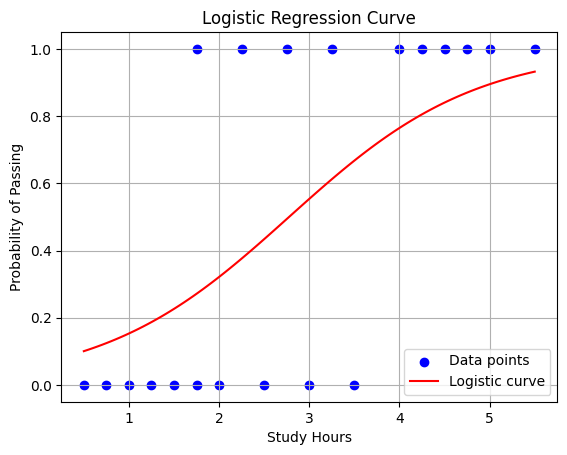

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
df = pd.read_csv("data.csv")


df.columns = df.columns.str.strip()
print(df.head(21))
X = df[["HOURS"]]   
y = df["PASS"]      


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# --- Step 7: Predict new value ---
new = float(input("enter the new hours : "))
new_data = pd.DataFrame({"HOURS": [new]})   # must match training feature name
new_pred = model.predict(new_data)
print(f"Predicted class for HOURS:{new} : {new_pred[0]}")

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

hours_range = np.linspace(df["HOURS"].min(), df["HOURS"].max(), 100).reshape(-1, 1)
probabilities = model.predict_proba(hours_range)[:, 1]

plt.scatter(X,y,color="blue", label="Data points")
plt.plot(hours_range, probabilities, color="red", label="Logistic curve")
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression Curve")
plt.legend()
plt.grid()
plt.show()